<div class="alert alert-block alert-success">
    
# FIT5196 Task 3 in Assessment 1
#### Student Name: xxxx
#### Student ID: xxxx

Date: xxxx


Environment: Python xxxx

Libraries used:
* xxxxx
* xxxxx
    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Examining Raw Data(given input file from task1)](#examine1) <br>
[4. Examining metadata](#examine2) <br>
[5. Data Analysis](#DA) <br>
    - [5.1 Question 1: How is xxxx related to xxxx?](#DI1) <br>
    - [5.2 Question 2: How does xxxxxx impact the rating of a business?](#DI2) <br>
[6. Summary](#summary) <br>
[7. References](#Ref) <br>

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

xxxxxxxxxx

In [ ]:
""" 
Main Dataset:
user_id: Unique identifier for each user.
name: User's name.
time: Timestamp of the review.
rating: Numerical rating given by the user.
text: The text content of the review.
pics: Information about any images included in the review.
resp: Response to the review, if any.
gmap_id: Unique identifier for the business/location being reviewed.
if_pic: Indicator of whether the review includes pictures.
if_response: Indicator of whether the review has a response.
pic_dim: Dimensions of the pictures included in the review.

Key Features:
1. The code reads multiple text files and excel files, and uses regular expressions to extract specific information fragments.
2. Convert the extracted data, such as converting the timestamp to standard format, converting the rating to float, etc.
3. Data converted from text files is merged with data extracted from Excel files.
4. The merged data is further cleaned, such as removing special characters from the text and converting all text to lowercase.
5. Data is grouped by gmap_id to count the number of comments, comment text, and responses for each gmap_id.
6. The processed data is saved in CSV and JSON formats. Load data:
7. Mark the text with a regular expression marker that captures letter words.
8. Tile the tokenized comments into a single word list for each business.
9. Remove common pause words by reading the stopwords_en.txt file.
10. Reduce words to their root form.
11. Delete words that appear in less than 5% of your documents.
12. Delete words with less than three characters.
13. Use the NLTK library to identify important metadata.
14. Convert tokenized text into a sparse matrix of token counts. 


Initial patterns, trends:
Reviews with higher ratings are likely to have more responses.
Some businesses may consistently receive a large number of comments, indicating popularity.

"""

<!-- Main Dataset:
user_id: Unique identifier for each user.
name: User’s name.
time: Timestamp of the review.
rating: Numerical rating given by the user.
text: The text content of the review.
pics: Information about any images included in the review.
resp: Response to the review.
gmap_id: Unique identifier for the business/location being reviewed.
if_pic: Indicator of whether the review includes pictures.
if_response: Indicator of whether the review has a response.
pic_dim: Dimensions of the pictures included in the review. -->



<!-- Key Features:
1. Read multiple text files and use regular expressions to extract specific pieces of information.
2. The extracted data is converted separately, such as time stamps to standard format and ratings to float.
3. The data converted from the text file is merged with the data extracted from the Excel file.
4. The merged data is further cleaned, such as removing special characters from the text and converting all text to lowercase.
5. The data is grouped by gmap_id to count the number of comments, comment text, and responses for each gmap_id.
6. The processed data is stored in CSV and JSON formats. 
7. The text is marked with a regular expression marker that captures letter words.
8. Tokenized comments are tiled into a single word list for each business, stored in the review_dictionary.
9. Remove common pause words by reading the stopwords_en.txt file.
10. Reduce the word to its root form.
11. Delete words in less than 5% of documents.
12. Delete words with less than 3 characters.
13. Use the NLTK library to identify important metadata.
14. Converts tokenized text into a matrix of markup counts.-->


<!-- Initial patterns/trends
--Comments with images may be associated with higher ratings.
--TThe higher the rating, the more likely it is to be replied -->

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div> 

The packages to be used in this assessment are imported in the following. They are used to fulfill the following tasks:

* **re:** to define and use regular expressions
* **pandas:** ...
* ...

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

ModuleNotFoundError: No module named 'folium'

<div class="alert alert-block alert-warning">

## 3.  Examining Raw Data(given input file from task1) <a class="anchor" name="examine1"></a>

 </div>

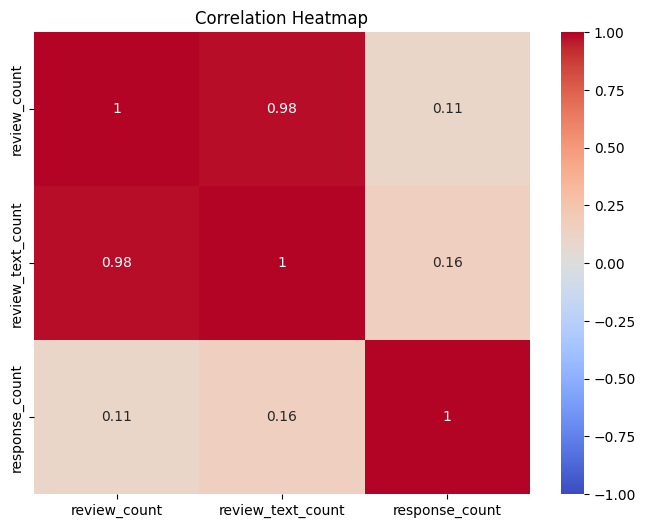

<Figure size 1000x600 with 0 Axes>

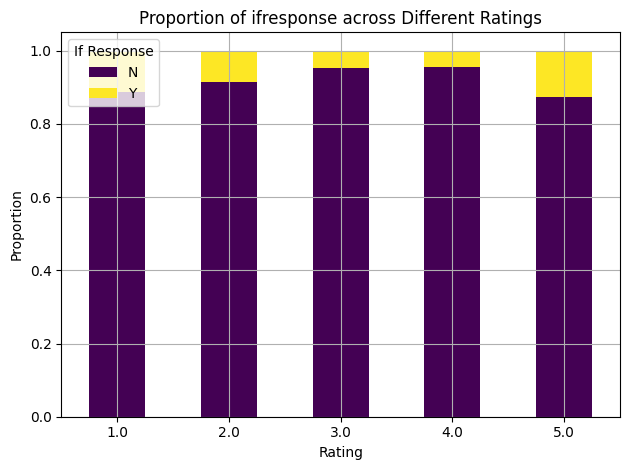

' The proportion of responses is generally low under different ratings. \nAnd the proportion of responses increased between the highest and lowest ratings. '

In [22]:
file_path = './task1_181.csv'
total_data_path = './combined_data.csv'
data = pd.read_csv(file_path)
combined_data = pd.read_csv(total_data_path)

plt.figure(figsize=(8, 6))
corr_matrix = data[['review_count', 'review_text_count', 'response_count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


""" review_count and review_text_count have a strong correlation:
The heat map shows a very high positive correlation (0.98) between review_count and review_text_count. This indicates that most comments contain text content.

response_count is weakly correlated with review_count/review_text_count:
response_count has a relatively low correlation with review_count(0.11) and review_text_count(0.16). 
This suggests that the number of reviews or text reviews a business receives does not strongly influence the likelihood that a business will respond to a review.

Independence of response_count:
response_count seems to be somewhat independent of the other two variables, and the correlation is close to zero. """


response_counts = combined_data.groupby(['rating', 'if_response']).size().unstack()
# Calculate the proportion of ifresponse 'Y' corresponding to each rating
response_ratios = response_counts.div(response_counts.sum(axis=1), axis=0)

# The scale graph is drawn to show the proportional relationship between rating and ifresponse
plt.figure(figsize=(10, 6))
response_ratios.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proportion of ifresponse across Different Ratings')
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='If Response', loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

""" The proportion of responses is generally low under different ratings. 
And the proportion of responses increased between the highest and lowest ratings. """

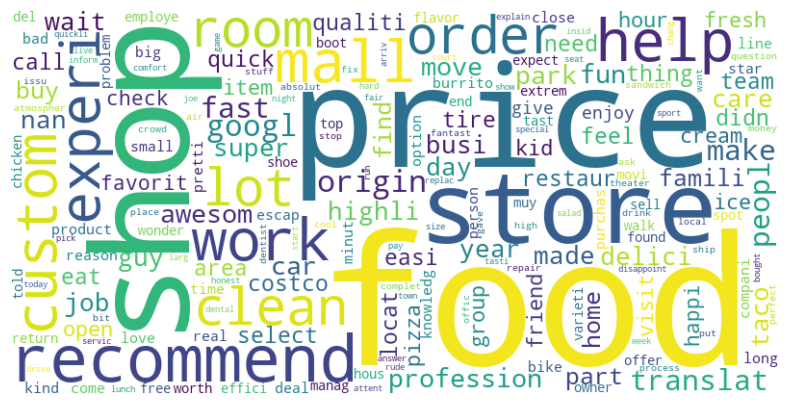

In [23]:
# Load the `181_vocab.txt` to map indices to words
vocab_file_path = './181_vocab.txt'
vocab = {}

# Reading the vocab file and mapping index to word
with open(vocab_file_path, 'r', encoding='utf-8') as vocab_file:
    for line in vocab_file:
        word, index = line.strip().split(':')
        vocab[int(index)] = word

# Load the `181_countvec.txt` to get the frequency of each word
countvec_file_path = './181_countvec.txt'
word_frequencies = {}

# Reading the countvec file and accumulating frequencies
with open(countvec_file_path, 'r', encoding='utf-8') as countvec_file:
    for line in countvec_file:
        parts = line.strip().split(',')
        for part in parts[1:]:
            index, freq = part.split(':')
            word = vocab.get(int(index), None)
            if word:
                word_frequencies[word] = word_frequencies.get(word, 0) + int(freq)

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

""" In the word cloud, words such as "price", "store", "food", "cost" and "recommend" are the most frequently mentioned words in reviews.
These keywords indicate what users are most concerned about when evaluating these stores or products.
The word cloud also contains many words related to services or experiences, For example, "customer", "service", "experience", "clean", "help", "quick" and "professional".
These words indicate that user reviews often mention experience-related aspects such as the quality of service, the cleanliness of the environment, and the professionalism of the staff.
There are also words in the word cloud that relate to the shopping experience and goods, such as "order", "product", "variety", "quality" and "location". 
This suggests that users also consider variety, quality, store location and order processing when evaluating items. """

<div class="alert alert-block alert-warning">

## 4.  Examining Metadata <a class="anchor" name="examine2"></a>

 </div>

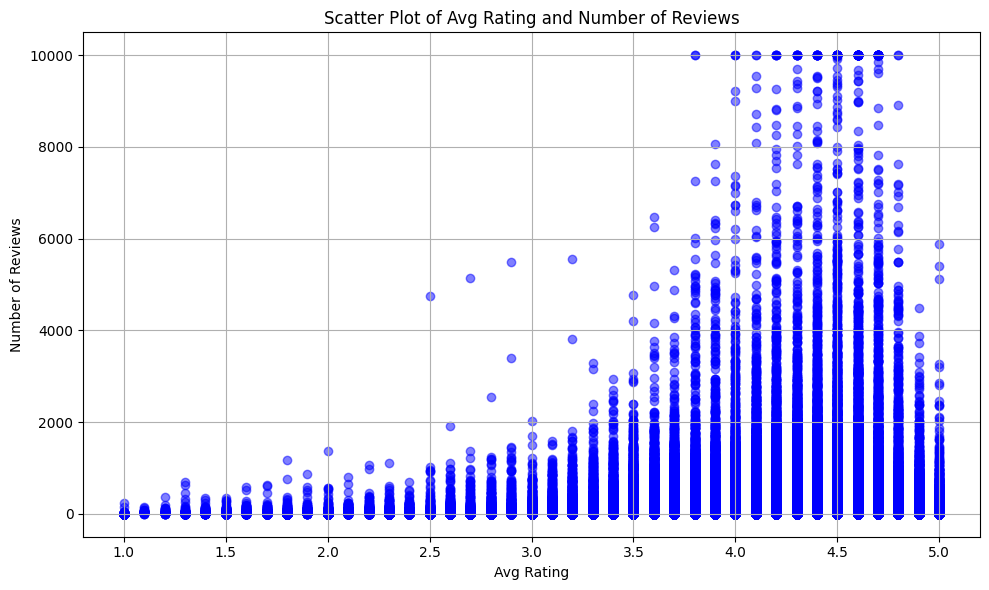

In [15]:
# Load the combined data from Task 1
metadata_path = './meta-California.json'

with open(metadata_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Put all the JSON objects into a list
json_text = '[' + text.replace('}\n{', '},\n{') + ']'

# Parse JSON arrays
try:
    data = json.loads(json_text)
    df = pd.DataFrame(data)
except json.JSONDecodeError as e:
    print(f"JSON error: {e}")



plt.figure(figsize=(10, 6))
plt.scatter(df['avg_rating'], df['num_of_reviews'], color='b', alpha=0.5)
plt.title('Scatter Plot of Avg Rating and Number of Reviews')
plt.xlabel('Avg Rating')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()

plt.show() 


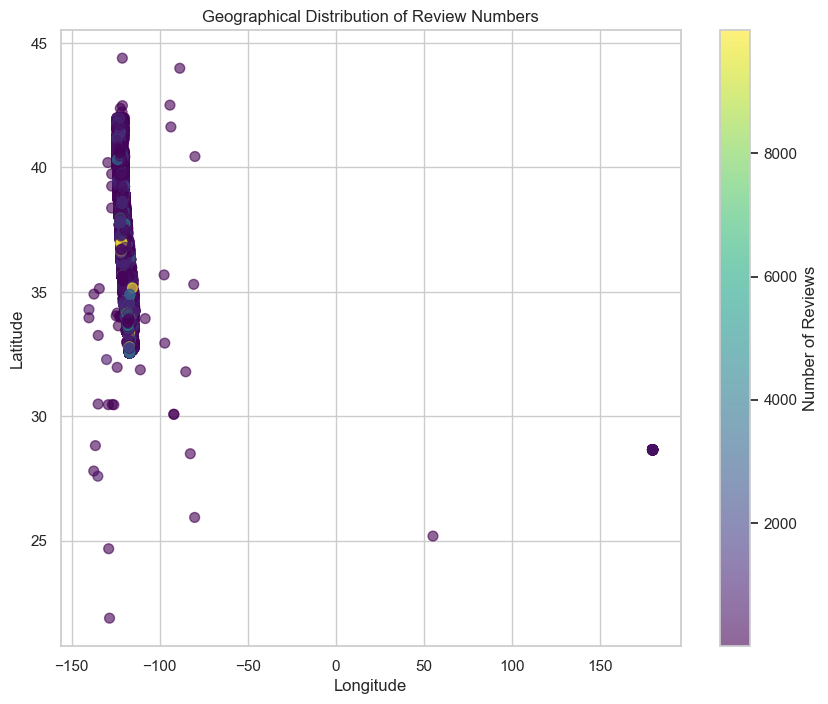

In [18]:
sns.set(style="whitegrid")

# Create a scatter plot, using latitude and longitude as the x and y axes, and set the color and size of the points according to num_of_reviews
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=df['longitude'], y=df['latitude'], c=df['num_of_reviews'], s=50, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Number of Reviews')
plt.title('Geographical Distribution of Review Numbers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

<div class="alert alert-block alert-warning">

## 5.  Data Analysis <a class="anchor" name="DA"></a>

 </div>

 In this section, we are looking into 5 data insights from the data. We believe that by looking into different factors that can impact on a business rating, we can have a better understanding on the importance of xxxxxxx.

 

In [20]:
""" We have 5 insights from the data.
1. The relationship between the number of reviews and ratings:
The scatter plot shows the relationship between avg_rating and num_of_reviews. 
We can see that as ratings increase, the number of reviews gradually increases and peaks between ratings approaching 4.0 and 4.5. 
This suggests that highly rated products or services tend to attract more user reviews, possibly because users feel more engaged or satisfied with highly rated items.

2.High correlation between the number of comments and the number of text comments:
The correlation heat map shows that the correlation between review_count and review_text_count is very high, reaching 0.98. 
This means that most reviews have text content, not just a simple rating. This may indicate that users' reviews of these stores or products are not limited to ratings, and many users are also willing to provide detailed feedback.
Since most reviews contain text, businesses may want to consider analyzing the text feedback more deeply to understand customer sentiment and trends.

3.Relationship between response rate and rating:
The response rate of users is relatively high when the ratings are 5 and 1. 
This indicates that when users are very or very dissatisfied with a product or service, merchants are more likely to reply or respond to those reviews. 
This trend may reflect the tendency of merchants to pay more attention to positive feedback.

4.User concerns displayed by Word cloud :
The word cloud map reveals the words most frequently mentioned by users in reviews, such as "price", "store", "food", "customer", etc.
This shows that price and food quality are the main concerns of users, while users also have a high level of attention to store service and customer experience. 
These high-frequency words can help us understand the focus of user reviews, so as to provide a reference for merchants to optimize services and products.

5.The effect of geography on reviews:
Most reviews have focused on latitudes between about 30° and 40°, and longitudes between about -120° and -100°. 
This area probably corresponds to the U.S. state of California and nearby areas, which is a densely populated and economically developed area, so there are more stores and a corresponding number of reviews. 
Other stores in remote areas have fewer reviews. 
According to the scatterplot above, the higher the number of reviews, the higher the score of the store tends to be. It can be seen that the consideration of the store location is also very important.
 """

' Potential actionable insights:\nSince most reviews contain text, businesses may want to consider analyzing the text feedback more deeply to understand customer sentiment and trends.\nImproved response rate:\nGiven the low correlation between the number of reviews and the number of responses, \nbusinesses can benefit from strategies that encourage more consistent responses to reviews, which may improve customer satisfaction. '

<div class="alert alert-block alert-info">
    
### 5.1. How is xxxx related to xxxx? <a class="anchor" name="DI1"></a>

<div class="alert alert-block alert-info">
    
### 5.2. How does xxxxxx impact the rating of a business? <a class="anchor" name="DI1"></a>

<div class="alert alert-block alert-warning">

## 6.  Data Analysis <a class="anchor" name="summary"></a>

 </div>

Based on the analysis above, we investigate questions on:
........
Our findings are:
.......

These findings tell us:
.......

 

<div class="alert alert-block alert-warning"> 

## 7. References <a class="anchor" name="Ref"></a>

</div>